In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from funciones import *

In [38]:
data = pd.read_csv('train.csv')
data.head()

,id,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,0,1,1,1,9238,1,1,126.0,1,1,...,0,6,7,6,12.428571,0,11.1,0.6,2.02,Graduate
1,1,1,17,1,9238,1,1,125.0,1,19,...,0,6,9,0,0.000000,0,11.1,0.6,2.02,Dropout
2,2,1,17,2,9254,1,1,137.0,1,3,...,0,6,0,0,0.000000,0,16.2,0.3,-0.92,Dropout
3,3,1,1,3,9500,1,1,131.0,1,19,...,0,8,11,7,12.820000,0,11.1,0.6,2.02,Enrolled
4,4,1,1,2,9500,1,1,132.0,1,19,...,0,7,12,6,12.933333,0,7.6,2.6,0.32,Graduate


#### Veamos nombres de nuestras variables, nulos y duplicados

In [39]:
'''No tenemos nulos'''
data.isnull().sum()

id                                                0
Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship 

In [40]:
'''Tenemos 38 columnas, 37 numericas y 1 categorica, que es nuestro target
Estas son variables numericas continuas (según Kaggle):

'Previous qualification (grade)'
'Admission grade' 
'Unemployment rate'
'Inflation rate'
'GDP' 

Por lo que el resto las vamos a meter en data_cat'''

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 38 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              76518 non-null  int64  
 1   Marital status                                  76518 non-null  int64  
 2   Application mode                                76518 non-null  int64  
 3   Application order                               76518 non-null  int64  
 4   Course                                          76518 non-null  int64  
 5   Daytime/evening attendance                      76518 non-null  int64  
 6   Previous qualification                          76518 non-null  int64  
 7   Previous qualification (grade)                  76518 non-null  float64
 8   Nacionality                                     76518 non-null  int64  
 9   Mother's qualification                 

In [41]:
data_num = data[['Previous qualification (grade)','Admission grade','Unemployment rate','Inflation rate',
'GDP', 'Curricular units 1st sem (grade)','Curricular units 2nd sem (grade)']]
data_cat = data.drop(data_num, axis=1)

In [42]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   id                                              76518 non-null  int64 
 1   Marital status                                  76518 non-null  int64 
 2   Application mode                                76518 non-null  int64 
 3   Application order                               76518 non-null  int64 
 4   Course                                          76518 non-null  int64 
 5   Daytime/evening attendance                      76518 non-null  int64 
 6   Previous qualification                          76518 non-null  int64 
 7   Nacionality                                     76518 non-null  int64 
 8   Mother's qualification                          76518 non-null  int64 
 9   Father's qualification                          76

In [43]:
data_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Previous qualification (grade)    76518 non-null  float64
 1   Admission grade                   76518 non-null  float64
 2   Unemployment rate                 76518 non-null  float64
 3   Inflation rate                    76518 non-null  float64
 4   GDP                               76518 non-null  float64
 5   Curricular units 1st sem (grade)  76518 non-null  float64
 6   Curricular units 2nd sem (grade)  76518 non-null  float64
dtypes: float64(7)
memory usage: 4.1 MB


In [44]:
columnas = data_cat.columns
curricular_1 = [col for col in columnas if col.startswith("Curricular units 1st sem")]
curricular_2 = [col for col in columnas if col.startswith("Curricular units 2nd sem")]

In [45]:
data_cat[['Course']].value_counts().sort_values(ascending=False)

Course
9500      12074
9773       8214
9238       7935
9147       7741
9254       5425
9085       5373
9670       4760
9991       4057
9003       3733
9070       3281
9853       3198
9119       3004
171        2859
8014       2438
9130       1606
9556        746
33           72
39            1
979           1
Name: count, dtype: int64

In [46]:
'''Vemos que la variable Daytime / Evening tiene bastante influencia en si los estudiantes aprueban sus asignaturas'''

print('1 - Daytime // 0 -- Evening')

print(data_cat[(data_cat['Daytime/evening attendance'] == 1)][['Daytime/evening attendance',curricular_1[3]]].sum())
print(data_cat[(data_cat['Daytime/evening attendance'] == 0)][['Daytime/evening attendance',curricular_1[3]]].sum())
print(data_cat[(data_cat['Daytime/evening attendance'] == 1)][['Daytime/evening attendance',curricular_2[3]]].sum())
print(data_cat[(data_cat['Daytime/evening attendance'] == 0)][['Daytime/evening attendance',curricular_2[3]]].sum())

1 - Daytime // 0 -- Evening
Daytime/evening attendance              70038
Curricular units 1st sem (approved)    299272
dtype: int64
Daytime/evening attendance                 0
Curricular units 1st sem (approved)    20460
dtype: int64
Daytime/evening attendance              70038
Curricular units 2nd sem (approved)    287803
dtype: int64
Daytime/evening attendance                 0
Curricular units 2nd sem (approved)    18820
dtype: int64


In [47]:
'''Aquí vemos los % de valores que cada categoría presenta en la columna target
Hay más graduados que no graduados, pero no es un desbalanceo muy grande'''
data_cat.Target.value_counts()*100/len(data_cat) 

Target
Graduate    47.416294
Dropout     33.058888
Enrolled    19.524818
Name: count, dtype: float64

In [48]:
'''Con esto vemos que en todas las categorias de target, la nacionalidad que más representación tiene es la 1, 
o sea la Portuguesa. Por lo que podríamos prescindir de la variable International'''


import matplotlib.pyplot as plt

# Calculate the percentages
percentages = data_cat.groupby('Target')['Nacionality'].value_counts() * 100 / len(data_cat)

'''# Plot the graph
plt.figure(figsize=(10, 6))
percentages.plot(kind='bar')
plt.xlabel('Target')
plt.ylabel('Percentage')
plt.title('Percentage of Nacionality by Target')
plt.show()'''

print(data_cat.groupby('Target')['Nacionality'].value_counts()*100/len(data_cat))

Target    Nacionality
Dropout   1              32.835411
          41              0.124154
          6               0.028751
          22              0.019603
          26              0.015683
          101             0.007841
          21              0.005228
          100             0.005228
          25              0.005228
          105             0.003921
          32              0.001307
          11              0.001307
          62              0.001307
          103             0.001307
          24              0.001307
          17              0.001307
Enrolled  1              19.404585
          41              0.043127
          26              0.024831
          6               0.018296
          22              0.007841
          105             0.003921
          103             0.003921
          62              0.003921
          24              0.003921
          100             0.002614
          21              0.002614
          101             0.00261

#### Vamos a ocuparnos de las variables categoricas, que son más. Vamos a conseguir sus dummies.

In [49]:
data_cat = data_cat.astype(str)
data_cat2 = data_cat.copy()
data_cat2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76518 entries, 0 to 76517
Data columns (total 31 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   id                                              76518 non-null  object
 1   Marital status                                  76518 non-null  object
 2   Application mode                                76518 non-null  object
 3   Application order                               76518 non-null  object
 4   Course                                          76518 non-null  object
 5   Daytime/evening attendance                      76518 non-null  object
 6   Previous qualification                          76518 non-null  object
 7   Nacionality                                     76518 non-null  object
 8   Mother's qualification                          76518 non-null  object
 9   Father's qualification                          76

In [50]:
data_cat = data_cat.drop(['id','International','Target'],axis=1)
data_cat

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (without evaluations)
0,1,1,1,9238,1,1,1,1,19,5,...,0,6,6,6,0,0,6,7,6,0
1,1,17,1,9238,1,1,1,19,19,9,...,0,6,8,4,0,0,6,9,0,0
2,1,17,2,9254,1,1,1,3,19,2,...,0,6,0,0,0,0,6,0,0,0
3,1,1,3,9500,1,1,1,19,3,3,...,0,7,9,7,0,0,8,11,7,0
4,1,1,2,9500,1,1,1,19,37,4,...,0,7,12,6,0,0,7,12,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76513,1,17,1,9254,1,1,1,19,1,7,...,0,6,9,6,0,0,6,8,5,0
76514,1,1,6,9254,1,1,1,1,38,4,...,0,6,22,4,0,0,6,9,6,0
76515,5,17,1,9085,1,1,1,37,37,9,...,0,5,13,4,2,0,5,8,5,1
76516,1,1,3,9070,1,1,1,38,37,5,...,0,6,0,0,0,0,6,0,0,0


In [51]:

from sklearn.preprocessing import OneHotEncoder

X = data_cat
y = data_cat2['Target']
 
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

hot_enc = OneHotEncoder(sparse_output=False, #por defecto el formato el formato es sparse
                               drop='first', # no creamos una nueva columna con la primera categoria que encuentra
                               handle_unknown='ignore') # ignora nuevas categorias en el test

hot_enc.fit(X_train)
hot_enc.transform(X_train)
columnas = hot_enc.get_feature_names_out()
columnas.shape

(503,)

In [52]:
len(columnas)
hot_enc.transform(X_train).shape

(57388, 503)

In [53]:
X_test.shape

(19130, 28)

In [54]:
X_train[columnas] = hot_enc.transform(X_train)


In [55]:
X_train = X_train.drop(columns=data_cat.columns,axis=1)


In [56]:
X_train.shape

(57388, 503)

In [57]:
hot_enc.transform(X_test)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [58]:
hot_enc.transform(X_test).shape

(19130, 503)

In [59]:
columnas_test = hot_enc.get_feature_names_out()
X_test[columnas_test] = hot_enc.transform(X_test)
X_test = X_test.drop(columns=data_cat.columns,axis=1)

In [60]:
columnas_test.shape

(503,)

##### Esto solo lo hago para ver a correlación con las numericas

<Axes: >

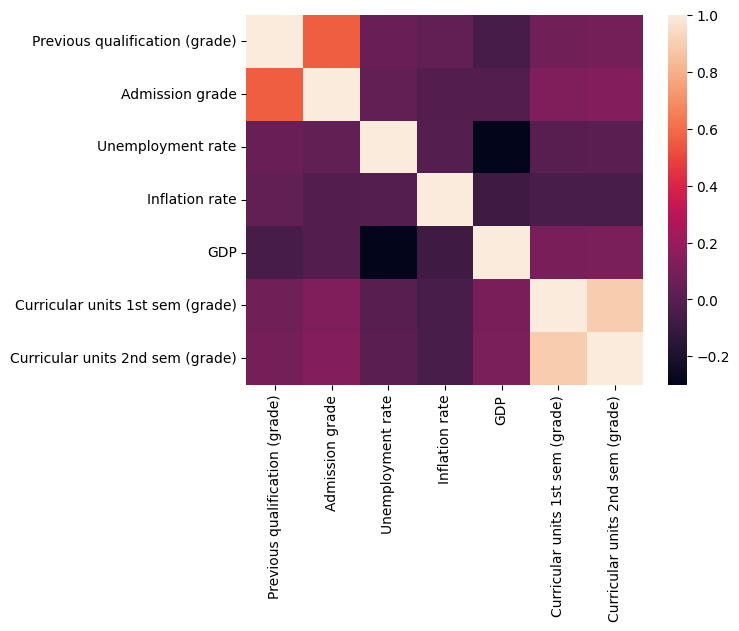

In [69]:
corrmat = data_num.corr()

sns.heatmap(corrmat)